### Import Library

In [1]:
# sys module
import nltk
from nltk.corpus import stopwords
from nltk.classify import naivebayes
import string
from sklearn.model_selection import train_test_split, LeavePOut, KFold, LeaveOneOut, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from itertools import combinations, permutations

# third parties module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read Data

In [2]:
imdb = pd.read_csv ("data/imdb_labelled.txt", sep='\t', names=['comment', 'sentiment'], header=None)
amazon = pd.read_csv ("data/amazon_cells_labelled.txt", sep='\t', names=['comment', 'sentiment'], header=None)
yelp = pd.read_csv ("data/yelp_labelled.txt", sep='\t', names=['comment', 'sentiment'], header=None)

In [3]:
data = [imdb, amazon, yelp]

### Preprocessing

In [4]:
stopword = stopwords.words ('english')
def preprocessing (comment):
    # remove punctuation
    for p in string.punctuation:
        comment = comment.replace (p, ' ')  
    # tokenize
    words = set (nltk.word_tokenize (comment.lower ()))
    # remove char less than 3
    words = set ([w for w in words if len (w) > 3])  
    # remove stopwords
    words = words - set (stopword)
    
    return words

for x in data:
    x['word'] = x['comment'].apply (preprocessing)

### Feature Extraction

In [5]:
# feature extraction
def extract_feature (word):
    feature = {}
    for w in word:
        feature[w] = True
    return feature

for x in data:
    x['feature'] = x['word'].apply (extract_feature)

#### Visualization Function 

In [6]:
name = ['IMDb', 'Amazon', 'Yelp']

for i in range(len(data)):
    data[i]['name'] = name[i]

In [7]:
# bar chart function

def create_bar_chart(performance, materials, yLabel, chartTitle):
    x_pos = np.arange(len(materials))
    fig, ax = plt.subplots()
    bar_plot = ax.bar(x_pos, performance, align='center', alpha=0.5, ecolor='black', capsize=10, color='mcygb')
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.93*height, performance[idx], ha='center', va='bottom', rotation=0)  
    ax.set_ylabel(yLabel)
    ax.set_ylim(0,1)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(materials)
    ax.set_title(chartTitle)
    ax.yaxis.grid(True)

In [8]:
# bar chart with error bar function

def create_bar_with_error_chart(CTEs, error, materials, yLabel, chartTitle):
    x_pos = np.arange(len(CTEs))
    fig, ax = plt.subplots()
    bar_plot = ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10, color='mcygb')
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/1.2, 1.0*height, CTEs[idx], ha='center', va='bottom', rotation=0)  
    ax.set_ylabel(yLabel)
    ax.set_ylim(0,1)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(materials)
    ax.set_title(chartTitle)
    ax.yaxis.grid(True)

In [9]:
# grouped bar chart function

def create_group_bar_chart(labels, performance, materials, chartTitle):
    fig, ax = plt.subplots(figsize=(15, 8))
    width = 1/(len(performance)+2)
    r = []
    for idx, val in enumerate(performance):
        if(idx==0):
            r.append(np.arange(len(labels)))
        else:
            r.append([x + width for x in r[idx-1]])
        bar_plot = ax.bar(r[idx], val, width=width, edgecolor='white', label=materials[idx])
        for i,rect in enumerate(bar_plot):
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1.0*height, performance[idx][i], ha='center', va='bottom', rotation=0)  
    ax.set_ylabel('value')
    ax.set_ylim([0, 1])
    ax.set_yticks(np.arange(0, 11)/10)
    ax.set_title(chartTitle)
    ax.set_xticks(r[int(len(r)/2)])
    ax.set_xticklabels(labels)
    ax.legend()
    ax.grid(True)
    ax.set_axisbelow(True)
    fig.tight_layout()
    
    plt.show()

In [10]:
# grouped bar chart with error function

def create_group_bar_with_error_chart(labels, performance, error, materials, chartTitle):
    fig, ax = plt.subplots(figsize=(15, 8))
    width = 1/(len(performance)+2)
    r = []
    for idx, val in enumerate(performance):
        if(idx==0):
            r.append(np.arange(len(labels)))
        else:
            r.append([x + width for x in r[idx-1]])
        ax.bar(r[idx], val, yerr=error[idx], width=width, edgecolor='white', label=materials[idx])
    ax.set_ylabel('value')
    ax.set_ylim([0, 1])
    ax.set_yticks(np.arange(0, 11)/10)
    ax.set_title(chartTitle)
    ax.set_xticks(r[int(len(r)/2)])
    ax.set_xticklabels(labels)
    ax.legend()
    ax.grid(True)
    ax.set_axisbelow(True)
    fig.tight_layout()
    
    plt.show()

In [11]:
# confusion matrix

def create_confusion_matrix(tn, fp, fn, tp, title) :
    confusion_matrix = pd.DataFrame({'Predicted True': [tp, fp],
                   'Predicted False': [fn, tn]},
                  index=['Actual True', 'Actual False'])
    print("Confusion Matrix " + title)
    print(confusion_matrix)
    print()

### Clasification

#### Condition 1 --> 1 dataset untuk dengan KFOLD

Confusion Matrix 5-Fold (Experiment-1) of IMDb
              Predicted True  Predicted False
Actual True               52                5
Actual False              35               58

Confusion Matrix 5-Fold (Experiment-2) of IMDb
              Predicted True  Predicted False
Actual True               48               26
Actual False              17               59

Confusion Matrix 5-Fold (Experiment-3) of IMDb
              Predicted True  Predicted False
Actual True               41               16
Actual False              21               72

Confusion Matrix 5-Fold (Experiment-4) of IMDb
              Predicted True  Predicted False
Actual True               67               31
Actual False              24               27

Confusion Matrix 5-Fold (Experiment-5) of IMDb
              Predicted True  Predicted False
Actual True               62               38
Actual False               4               45



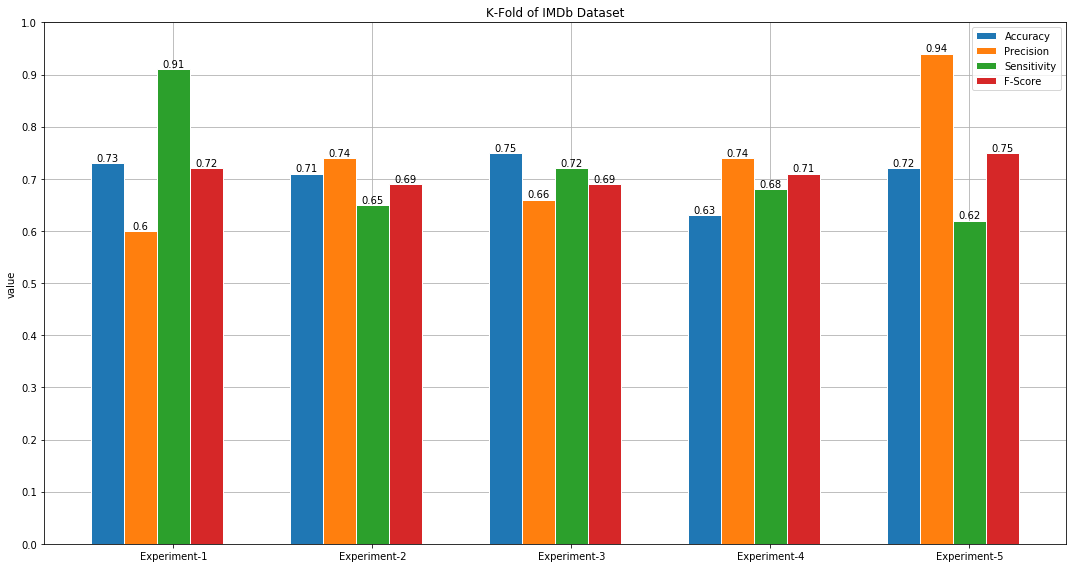

Confusion Matrix 5-Fold (Experiment-1) of Amazon
              Predicted True  Predicted False
Actual True               89               12
Actual False              31               68

Confusion Matrix 5-Fold (Experiment-2) of Amazon
              Predicted True  Predicted False
Actual True               98               12
Actual False              23               67

Confusion Matrix 5-Fold (Experiment-3) of Amazon
              Predicted True  Predicted False
Actual True               85               16
Actual False              31               68

Confusion Matrix 5-Fold (Experiment-4) of Amazon
              Predicted True  Predicted False
Actual True               86               11
Actual False              31               72

Confusion Matrix 5-Fold (Experiment-5) of Amazon
              Predicted True  Predicted False
Actual True               73               18
Actual False              30               79



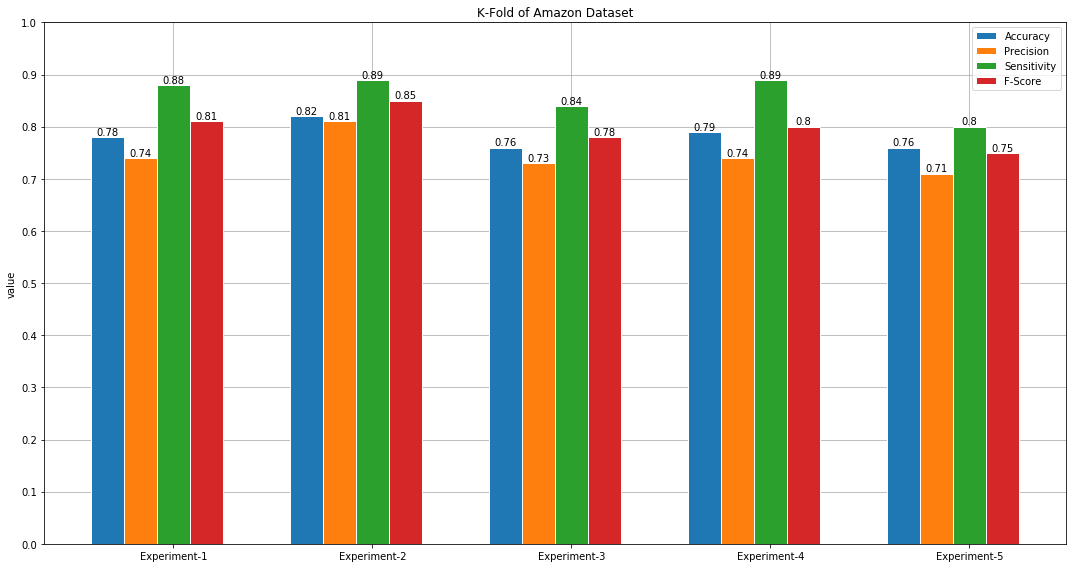

Confusion Matrix 5-Fold (Experiment-1) of Yelp
              Predicted True  Predicted False
Actual True               87               25
Actual False              23               65

Confusion Matrix 5-Fold (Experiment-2) of Yelp
              Predicted True  Predicted False
Actual True               81               30
Actual False              19               70

Confusion Matrix 5-Fold (Experiment-3) of Yelp
              Predicted True  Predicted False
Actual True               81               31
Actual False              18               70

Confusion Matrix 5-Fold (Experiment-4) of Yelp
              Predicted True  Predicted False
Actual True               94               23
Actual False              18               65

Confusion Matrix 5-Fold (Experiment-5) of Yelp
              Predicted True  Predicted False
Actual True               44                4
Actual False              50              102



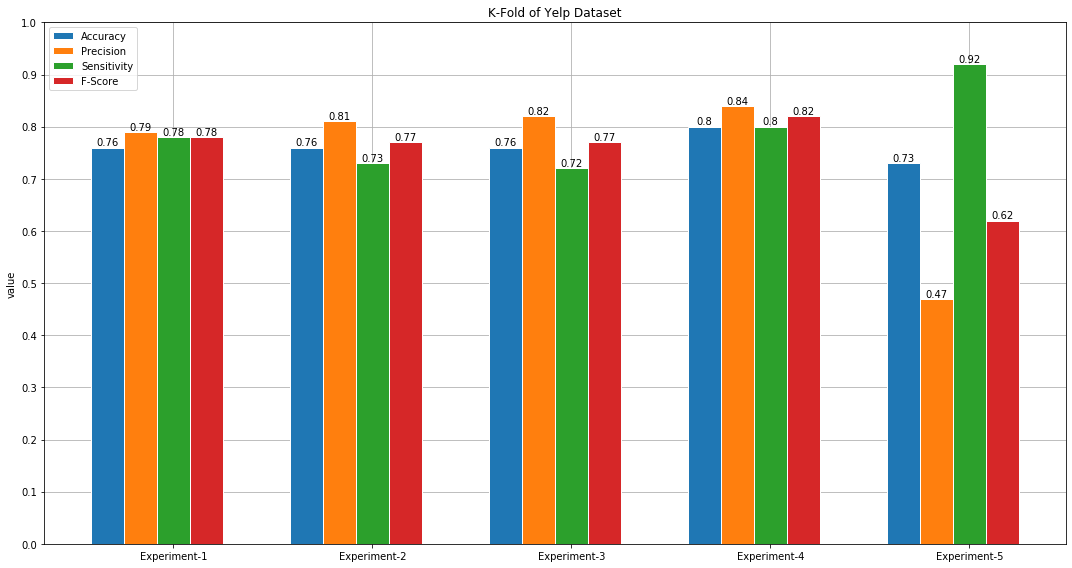

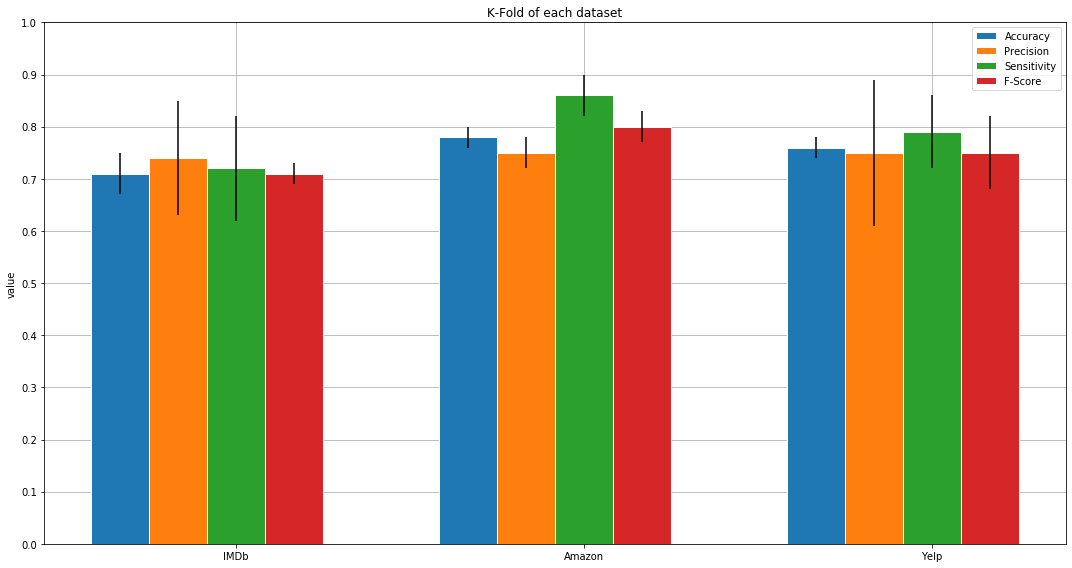

In [12]:
# prepare data for visualization
materials = ['Fold ' + str(i+1) for i in range(5)]
mean_accuracy_each_dataset = []
stdev_accuracy_each_dataset = []
mean_sensitivity_each_dataset = []
stdev_sensitivity_each_dataset = []
mean_precision_each_dataset = []
stdev_precision_each_dataset = []
mean_f1score_each_dataset = []
stdev_f1score_each_dataset = []
materials_each_dataset = []

for x in data:
    performance=[]
    accuracy_list = []
    precision_list = []
    sensitivity_list = []
    fscore_list = []
    X = x['feature'].values
    Y = x['sentiment'].values
    kf = KFold(n_splits=5)
    k = 0
    for train, test in kf.split(X):
        k+=1
        classifier = naivebayes.NaiveBayesClassifier.train(np.concatenate((X[train].reshape(-1,1), Y[train].reshape(-1,1)), axis=1))
        predicted = classifier.classify_many(X[test])
        accuracy_list.append(round(accuracy_score(Y[test], predicted), 2))
        precision_list.append(round(precision_score(Y[test], predicted), 2))
        sensitivity_list.append(round(recall_score(Y[test], predicted), 2))
        fscore_list.append(round(f1_score(Y[test], predicted), 2))
        tn, fp, fn, tp = confusion_matrix(Y[test], predicted).ravel()
        create_confusion_matrix(tn, fp, fn, tp, ('5-Fold (Experiment-' + str(k) + ') of ' + x['name'][0]))
        
    # create bar chart K-Fold of each Dataset
    performance.append(accuracy_list)
    performance.append(precision_list)
    performance.append(sensitivity_list)
    performance.append(fscore_list)
    create_group_bar_chart(['Experiment-' + str(i+1) for i in range(kf.n_splits)], performance, ['Accuracy', 'Precision', 'Sensitivity', 'F-Score'], 'K-Fold of ' + x['name'][0] + ' Dataset')
    
    # prepare data to create bar chart K-Fold of all Dataset
    mean_accuracy_each_dataset.append(round(np.mean(accuracy_list),2))
    stdev_accuracy_each_dataset.append(round(np.std(accuracy_list),2))
    mean_precision_each_dataset.append(round(np.mean(precision_list),2))
    stdev_precision_each_dataset.append(round(np.std(precision_list),2))
    mean_sensitivity_each_dataset.append(round(np.mean(sensitivity_list),2))
    stdev_sensitivity_each_dataset.append(round(np.std(sensitivity_list),2))
    mean_f1score_each_dataset.append(round(np.mean(fscore_list),2))
    stdev_f1score_each_dataset.append(round(np.std(fscore_list),2))
    materials_each_dataset.append(x['name'][0])

# create bar chart K-Fold of all Dataset
performance_each_dataset = []
performance_each_dataset.append(mean_accuracy_each_dataset)
performance_each_dataset.append(mean_precision_each_dataset)
performance_each_dataset.append(mean_sensitivity_each_dataset)
performance_each_dataset.append(mean_f1score_each_dataset)
error_each_dataset = []
error_each_dataset.append(stdev_accuracy_each_dataset)
error_each_dataset.append(stdev_precision_each_dataset)
error_each_dataset.append(stdev_sensitivity_each_dataset)
error_each_dataset.append(stdev_f1score_each_dataset)
create_group_bar_with_error_chart(materials_each_dataset, performance_each_dataset, error_each_dataset, ['Accuracy', 'Precision', 'Sensitivity', 'F-Score'], 'K-Fold of each dataset')

#### Condition 2 --> 1 dataset untuk train, 1 dataset untuk test

Confusion Matrix Combi 1 of 1 Train Dataset : 1 Test Dataset
              Predicted True  Predicted False
Actual True              383              117
Actual False             196              304

Confusion Matrix Combi 2 of 1 Train Dataset : 1 Test Dataset
              Predicted True  Predicted False
Actual True              352              148
Actual False             175              325

Confusion Matrix Combi 3 of 1 Train Dataset : 1 Test Dataset
              Predicted True  Predicted False
Actual True              283              103
Actual False             145              217

Confusion Matrix Combi 4 of 1 Train Dataset : 1 Test Dataset
              Predicted True  Predicted False
Actual True              379              121
Actual False             179              321

Confusion Matrix Combi 5 of 1 Train Dataset : 1 Test Dataset
              Predicted True  Predicted False
Actual True              255              131
Actual False             108              254



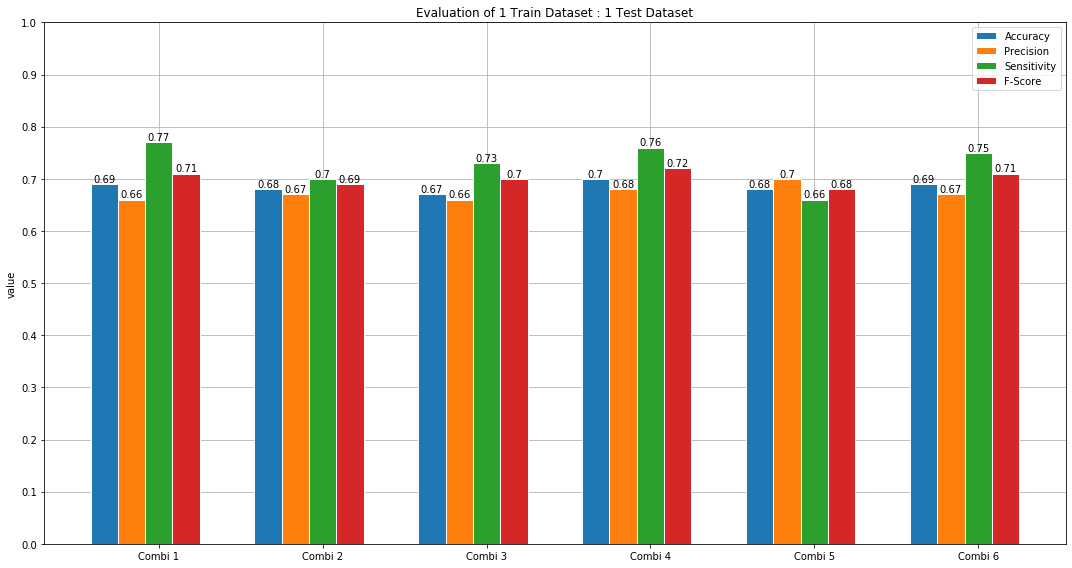

In [13]:
list_index = np.arange(len(data))
list_combination = permutations(list_index, 2)
list_combination = [list(x) for x in list_combination]
accuracy_list = []
precision_list = []
sensitivity_list = []
fscore_list = []
materials = ['Combi ' + str(i+1) for i in range(len(list_combination))]
i = 1
for comb in list_combination:
    classifier = naivebayes.NaiveBayesClassifier.train(data[comb[0]][['feature','sentiment']].values)
    predicted = classifier.classify_many(data[comb[1]]['feature'].values)
    accuracy_list.append(round(accuracy_score(data[comb[1]]['sentiment'].values, predicted), 2))
    precision_list.append(round(precision_score(data[comb[1]]['sentiment'].values, predicted), 2))
    sensitivity_list.append(round(recall_score(data[comb[1]]['sentiment'].values, predicted), 2))
    fscore_list.append(round(f1_score(data[comb[1]]['sentiment'].values, predicted), 2))
    tn, fp, fn, tp = confusion_matrix(data[comb[1]]['sentiment'].values, predicted).ravel()
    create_confusion_matrix(tn, fp, fn, tp, ("Combi " + str(i) + " of 1 Train Dataset : 1 Test Dataset"))
    i+=1

# create bar chart for 1 train dataset : 1 test dataset
performance=[]
performance.append(accuracy_list)
performance.append(precision_list)
performance.append(sensitivity_list)
performance.append(fscore_list)
create_group_bar_chart([i for i in materials], performance, ['Accuracy', 'Precision', 'Sensitivity', 'F-Score'], 'Evaluation of 1 Train Dataset : 1 Test Dataset')

#### Condition 3 --> 2 dataset untuk train, 1 dataset untuk test

Confusion Matrix Combi 1 of 2 Train Dataset : 1 Test Dataset
              Predicted True  Predicted False
Actual True              270              116
Actual False              97              265

Confusion Matrix Combi 2 of 2 Train Dataset : 1 Test Dataset
              Predicted True  Predicted False
Actual True              386              114
Actual False             171              329

Confusion Matrix Combi 3 of 2 Train Dataset : 1 Test Dataset
              Predicted True  Predicted False
Actual True              372              128
Actual False             140              360



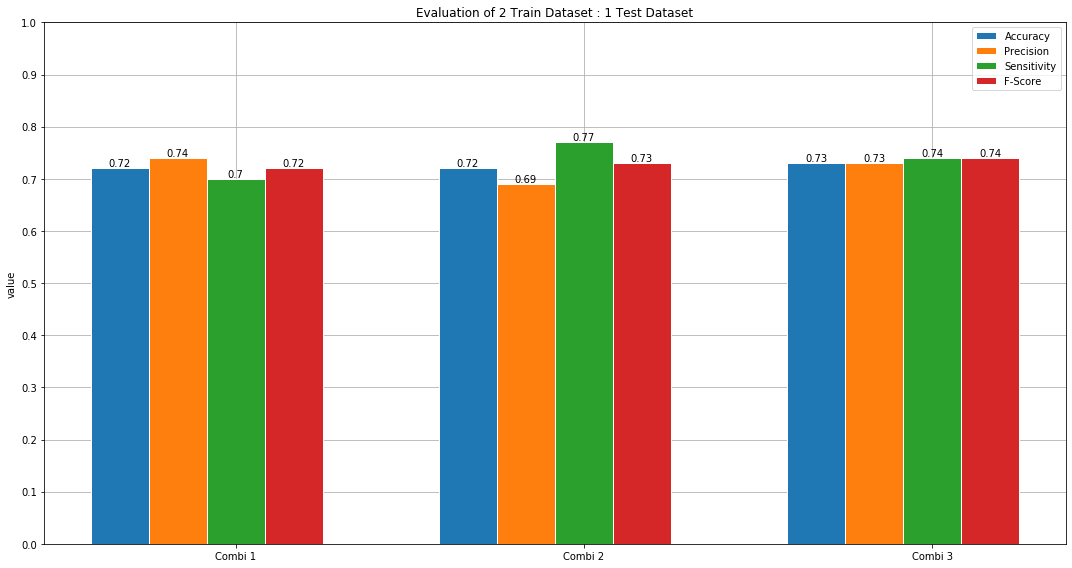

In [14]:
list_index = np.arange(len(data))
loo = LeaveOneOut()
accuracy_list = []
precision_list = []
sensitivity_list = []
fscore_list = []
materials = ['Combi ' + str(i+1) for i in range(len(list_index))]
i=0
for train, test in loo.split(list_index):
    i+=1
    classifier = naivebayes.NaiveBayesClassifier.train(np.concatenate((data[train[0]][['feature','sentiment']].values,data[train[1]][['feature','sentiment']].values)))
    predicted = classifier.classify_many(data[test[0]]['feature'].values)
    accuracy_list.append(round(accuracy_score(data[test[0]]['sentiment'].values, predicted), 2))
    precision_list.append(round(precision_score(data[test[0]]['sentiment'].values, predicted), 2))
    sensitivity_list.append(round(recall_score(data[test[0]]['sentiment'].values, predicted), 2))
    fscore_list.append(round(f1_score(data[test[0]]['sentiment'].values, predicted), 2))
    tn, fp, fn, tp = confusion_matrix(data[test[0]]['sentiment'].values, predicted).ravel()
    create_confusion_matrix(tn, fp, fn, tp, ("Combi " + str(i) + " of 2 Train Dataset : 1 Test Dataset"))
    
# create bar chart for 2 train dataset : 1 test dataset
performance=[]
performance.append(accuracy_list)
performance.append(precision_list)
performance.append(sensitivity_list)
performance.append(fscore_list)
create_group_bar_chart([i for i in materials], performance, ['Accuracy', 'Precision', 'Sensitivity', 'F-Score'], 'Evaluation of 2 Train Dataset : 1 Test Dataset')

#### Condition 4 --> 3 dataset untuk dengan KFOLD

Confusion Matrix 5-Fold (Experiment-1) of All Dataset
              Predicted True  Predicted False
Actual True              219               28
Actual False             133              170

Confusion Matrix 5-Fold (Experiment-2) of All Dataset
              Predicted True  Predicted False
Actual True              240               83
Actual False              44              183

Confusion Matrix 5-Fold (Experiment-3) of All Dataset
              Predicted True  Predicted False
Actual True              222               52
Actual False              77              199

Confusion Matrix 5-Fold (Experiment-4) of All Dataset
              Predicted True  Predicted False
Actual True              225               68
Actual False              48              208

Confusion Matrix 5-Fold (Experiment-5) of All Dataset
              Predicted True  Predicted False
Actual True              208               41
Actual False             102              198



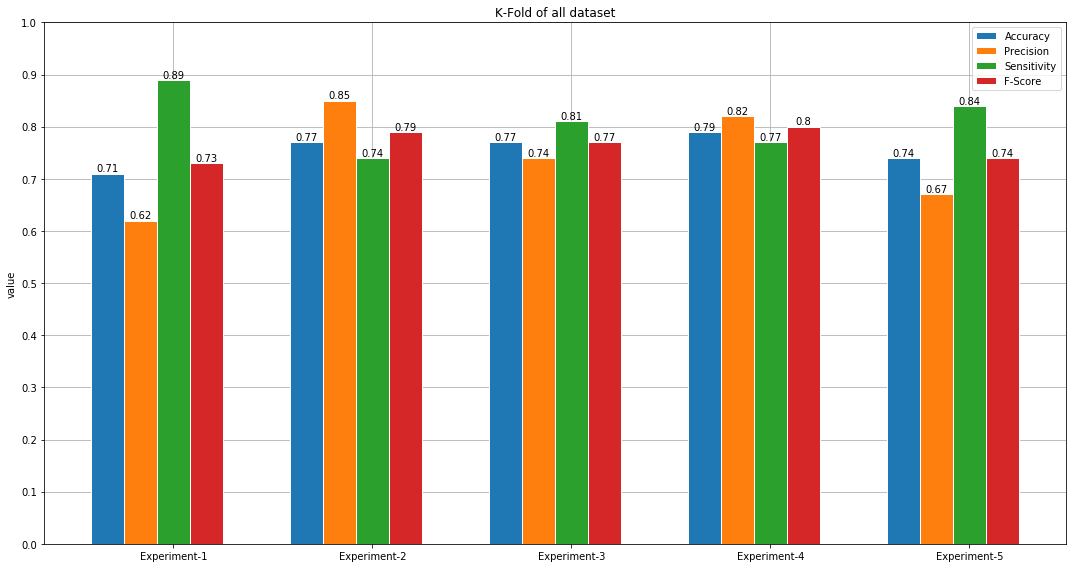

In [16]:
combine_data = data[0].append(data[1]).append(data[2])
X = combine_data['feature'].values
Y = combine_data['sentiment'].values
kf = KFold(n_splits=5)
accuracy_list = []
precision_list = []
sensitivity_list = []
fscore_list = []
materials = ['Experiment-' + str(i+1) for i in range(5)]
k = 0
for train, test in kf.split(X):
    k+=1
    classifier = naivebayes.NaiveBayesClassifier.train(np.concatenate((X[train].reshape(-1,1), Y[train].reshape(-1,1)), axis=1))
    predicted = classifier.classify_many(X[test])
    accuracy_list.append(round(accuracy_score(Y[test], predicted), 2))
    precision_list.append(round(precision_score(Y[test], predicted), 2))
    sensitivity_list.append(round(recall_score(Y[test], predicted), 2))
    fscore_list.append(round(f1_score(Y[test], predicted), 2))
    tn, fp, fn, tp = confusion_matrix(Y[test], predicted).ravel()
    create_confusion_matrix(tn, fp, fn, tp, ('5-Fold (Experiment-' + str(k) + ') of All Dataset'))
    
# create bar chart for K-Fold all dataset
performance=[]
performance.append(accuracy_list)
performance.append(precision_list)
performance.append(sensitivity_list)
performance.append(fscore_list)
create_group_bar_chart([i for i in materials], performance, ['Accuracy', 'Precision', 'Sensitivity', 'F-Score'], 'K-Fold of all dataset')